# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('Mall_Customers.csv')

## Explore Data

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [33]:
lab=LabelEncoder()
data['Gender']=lab.fit_transform(data['Gender'])

In [35]:
st=StandardScaler()
xdata=st.fit_transform(data)

In [36]:
xdata

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148,
         1.26233958],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407,
         1.26233958],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298,
         1.26233958],
       ...,
       [ 1.68877065,  1.12815215, -0.49160182,  2.49780745,  0.92395314,
         0.44529131],
       [ 1.70609137,  1.12815215, -0.49160182,  2.91767117, -1.25005425,
        -0.37175697],
       [ 1.7234121 ,  1.12815215, -0.6351352 ,  2.91767117,  1.27334719,
         0.44529131]])

In [39]:
Model=KMeans(n_clusters=9)
Model.fit(xdata)

C:\Users\MaTReX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MaTReX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=9)

In [40]:
Model.inertia_

249.6121734322508

In [41]:
clusters=[]
j=[]

In [42]:
for i in range(1,12):
    Model=KMeans(n_clusters=i)
    Model.fit(xdata)
    clusters.append(i)
    j.append(Model.inertia_)

C:\Users\MaTReX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MaTReX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MaTReX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MaTReX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

In [44]:
clusters

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [45]:
j

[1200.0,
 822.4145169039462,
 644.2418935618409,
 525.6027683631493,
 446.69855481034637,
 368.00167294857124,
 330.33165148817744,
 294.603011630901,
 255.71430977326267,
 218.29435523670838,
 190.813676968668]

In [46]:
pd.DataFrame({'number': clusters  ,'cluster' :j})

,number,cluster
0,1,1200.000000
1,2,822.414517
2,3,644.241894
3,4,525.602768
4,5,446.698555
5,6,368.001673
6,7,330.331651
7,8,294.603012
8,9,255.714310
9,10,218.294355


Text(0, 0.5, 'perc of Error')

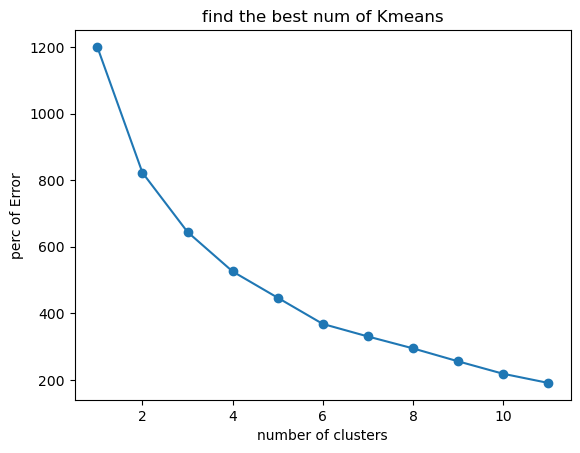

In [47]:
plt.plot(clusters,j , marker='o')
plt.title('find the best num of Kmeans')
plt.xlabel('number of clusters')
plt.ylabel('perc of Error')

In [49]:
Model=KMeans(n_clusters=4)
Model.fit(data)
Model.inertia_

C:\Users\MaTReX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MaTReX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


195401.19855991466

In [50]:
prd=Model.predict(data)

In [51]:
data['K_means']=prd

In [52]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K_means
0,1,1,19,15,39,3
1,2,1,21,15,81,3
2,3,0,20,16,6,3
3,4,0,23,16,77,3
4,5,0,31,17,40,3
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,2
197,198,1,32,126,74,1
198,199,1,32,137,18,2


In [53]:
df1=data[data['K_means']==0]
df2=data[data['K_means']==1]
df3=data[data['K_means']==2]
df4=data[data['K_means']==3]


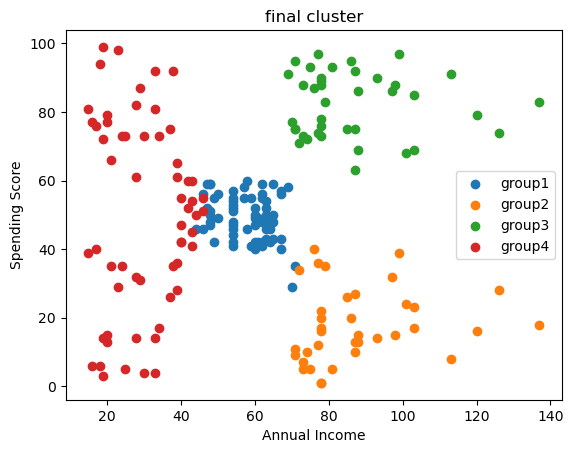

In [31]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='group1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='group2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='group3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='group4')
plt.title('final cluster')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()


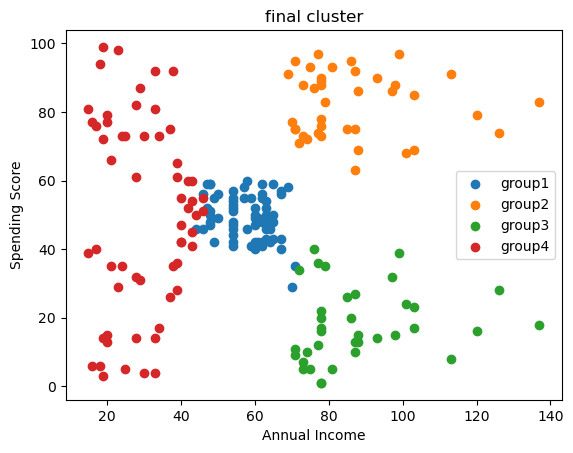

In [54]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='group1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='group2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='group3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='group4')
plt.title('final cluster')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

## Data Analysis

<Axes: xlabel='K_means', ylabel='count'>

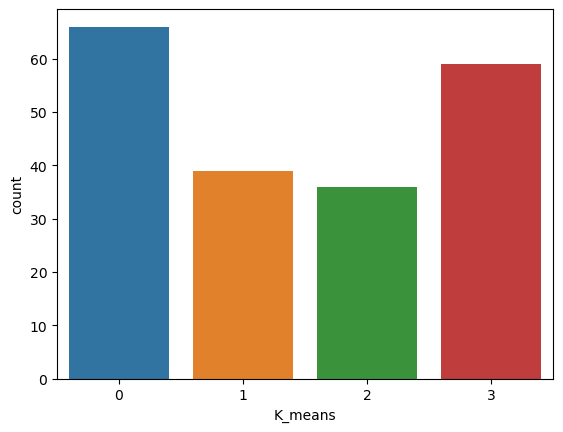

In [59]:
sns.countplot(data=data,x=data['K_means'])

In [64]:
data['Gender']=data['Gender'].replace({1:'Male',0:'Female'})
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K_means
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


<Axes: ylabel='count'>

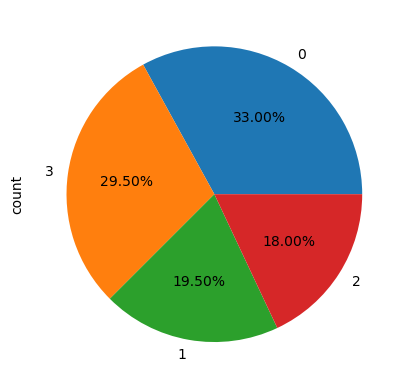

In [74]:
data['K_means'].value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='K_means', ylabel='Spending Score (1-100)'>

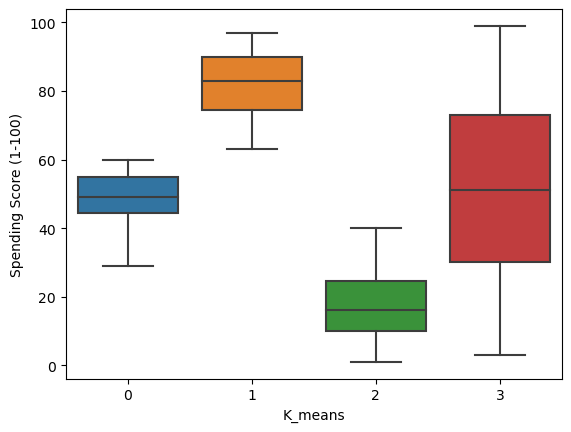

In [77]:
sns.boxplot(x=data['K_means'],y=data['Spending Score (1-100)'],data=data)

<Axes: xlabel='Age', ylabel='Count'>

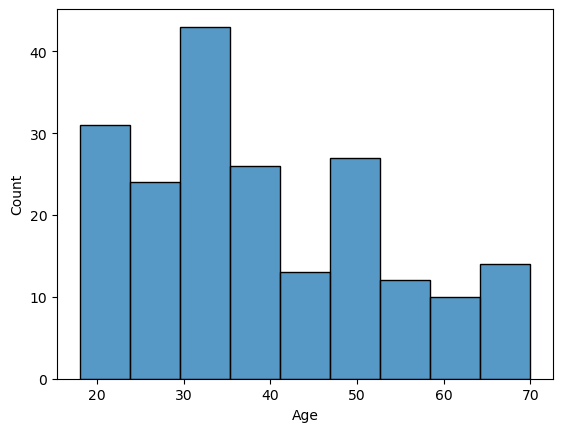

In [79]:
sns.histplot(data['Age'])

<Axes: xlabel='K_means', ylabel='count'>

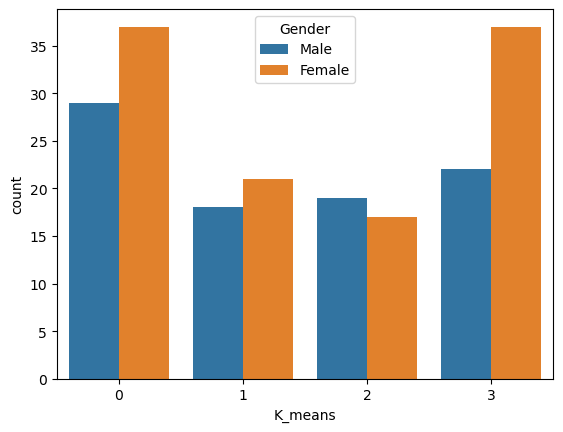

In [81]:

sns.countplot(data=data,x=data['K_means'],hue=data['Gender'])